In [ ]:
# Import necessary libraries
from google.colab import drive
drive.mount('/content/drive')
import os # For working with file paths
import pandas as pd # For reading and manipulating data files
import random # For randomly selecting audio files
import numpy as np # For processing audio data and generating spectrograms
import librosa # For loading and processing audio data
import librosa.display # For displaying audio data and spectrograms
import IPython.display as ipd # For displaying audio and image data
from IPython.core.display import display
import seaborn as sns # For plotting spectrograms
import matplotlib.pyplot as plt # For plotting spectrograms
from matplotlib.colors import Normalize # For working with color maps in matplotlib

# Set up inline plotting
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")


Mounted at /content/drive


**Importing the data**

In [ ]:
#RAVDEES DATASET
# Initialize empty lists to store file paths, duration, and labels
paths, labels, duration = [], [], []

# Walk through the directory containing RAVDESS data and its subdirectories
for dirname, _, filenames in os.walk('/content/drive/MyDrive/CapstoneProject19bce1693/inputfiles/RAVDEES'):
    # Loop through all the filenames in the directory
    for filename in filenames:
        # Append the full file path to the list of paths
        paths.append(os.path.join(dirname, filename))
        # Calculate the duration of the audio file using librosa and append it to the list of durations
        duration.append(round(librosa.get_duration(filename=paths[-1]), 3))
        # Extract the label from the filename
        label = filename[::-1].split('_')[0][::-1]
        # Based on the label, assign an emotion to the audio file and append it to the list of labels
        if label[6:8] == '01':
            labels.append('neutral')
        elif label[6:8] == '02':
            labels.append('calm')
        elif label[6:8] == '03':
            labels.append('happy')
        elif label[6:8] == '04':
            labels.append('sad')
        elif label[6:8] == '05':
            labels.append('angry')
        elif label[6:8] == '06':
            labels.append('fear')
        elif label[6:8] == '07':
            labels.append('disgust')
        elif label[6:8] == '08':
            labels.append('surprise')

# Create a pandas dataframe to store the file paths, durations, dataset, and emotions
df_ravdess = pd.DataFrame({'path':paths,'duration': duration, 'dataset': 'RAVDESS', 'emotion':labels})

# Print a random sample of 5 rows from the dataframe
df_ravdess.sample(10)

,path,duration,dataset,emotion
2475,/content/drive/MyDrive/CapstoneProject19bce169...,3.470,RAVDESS,happy
332,/content/drive/MyDrive/CapstoneProject19bce169...,3.704,RAVDESS,fear
366,/content/drive/MyDrive/CapstoneProject19bce169...,3.403,RAVDESS,calm
2543,/content/drive/MyDrive/CapstoneProject19bce169...,4.037,RAVDESS,sad
980,/content/drive/MyDrive/CapstoneProject19bce169...,3.570,RAVDESS,happy
1935,/content/drive/MyDrive/CapstoneProject19bce169...,3.904,RAVDESS,sad
1607,/content/drive/MyDrive/CapstoneProject19bce169...,4.104,RAVDESS,disgust
1559,/content/drive/MyDrive/CapstoneProject19bce169...,3.270,RAVDESS,surprise
1429,/content/drive/MyDrive/CapstoneProject19bce169...,3.904,RAVDESS,fear
375,/content/drive/MyDrive/CapstoneProject19bce169...,3.637,RAVDESS,angry


In [ ]:
#TESSDATASET
# Import necessary libraries
import os
import librosa
import pandas as pd

# Initialize empty lists to store file paths, labels, and duration
paths, labels, duration = [], [], []

# Walk through the directory containing TESS data and its subdirectories
for dirname, _, filenames in os.walk('/content/drive/MyDrive/CapstoneProject19bce1693/inputfiles/TESS'):
    # Loop through all the filenames in the directory
    for filename in filenames:
        # Append the full file path to the list of paths
        paths.append(os.path.join(dirname, filename))
        # Calculate the duration of the audio file using librosa and append it to the list of durations
        duration.append(round(librosa.get_duration(filename=paths[-1]), 3))
        # Extract the label from the filename and append it to the list of labels
        label = filename[::-1].split('_')[0][::-1]
        labels.append(label[:-4].lower())

# Create a pandas dataframe to store the file paths, durations, dataset, and emotions
df_tess = pd.DataFrame({'path':paths,'duration': duration, 'dataset': 'TESS', 'emotion':labels})

# Replace 'ps' (pleasant surprise) with 'surprise' in the emotion column of the dataframe
df_tess['emotion'] = df_tess['emotion'].replace(['ps'], 'surprise')

# Print a random sample of 10 rows from the dataframe
df_tess.sample(10)


,path,duration,dataset,emotion
2797,/content/drive/MyDrive/CapstoneProject19bce169...,2.496,TESS,disgust
5061,/content/drive/MyDrive/CapstoneProject19bce169...,1.540,TESS,angry
341,/content/drive/MyDrive/CapstoneProject19bce169...,1.950,TESS,fear
1645,/content/drive/MyDrive/CapstoneProject19bce169...,1.759,TESS,surprise
445,/content/drive/MyDrive/CapstoneProject19bce169...,2.094,TESS,neutral
1459,/content/drive/MyDrive/CapstoneProject19bce169...,2.374,TESS,sad
1886,/content/drive/MyDrive/CapstoneProject19bce169...,2.081,TESS,happy
1709,/content/drive/MyDrive/CapstoneProject19bce169...,2.260,TESS,surprise
4012,/content/drive/MyDrive/CapstoneProject19bce169...,2.582,TESS,disgust
3954,/content/drive/MyDrive/CapstoneProject19bce169...,1.739,TESS,angry


In [ ]:
# Getting SAVEE data
paths, labels, duration = [], [], []

for dirname, _, filenames in os.walk('/content/drive/MyDrive/CapstoneProject19bce1693/inputfiles/SAVEE'):
    for filename in filenames:

        paths.append(os.path.join(dirname, filename))

        label = filename[::-1].split('_')[0][::-1]

        if label[:1] == 'a':
            labels.append('angry')
        elif label[:1] == 'd':
            labels.append('disgust')
        elif label[:1] == 'f':
            labels.append('fear')
        elif label[:1] == 'h':
            labels.append('happy')
        elif label[:1] == 'n':
            labels.append('neutral')
        elif label[:1] == 's':
            if label[:2] == 'sa':
                labels.append('sad')
            else:
                labels.append('surprise')

paths = paths[1:] # to filter out 'info.txt' file

for file in paths:
    duration.append(round(librosa.get_duration(filename=file), 3))

df_savee = pd.DataFrame({'path':paths, 'duration': duration, 'dataset': 'SAVEE', 'emotion':labels})

df_savee.sample(10)


,path,duration,dataset,emotion
919,/content/drive/MyDrive/CapstoneProject19bce169...,3.289,SAVEE,neutral
347,/content/drive/MyDrive/CapstoneProject19bce169...,4.190,SAVEE,surprise
52,/content/drive/MyDrive/CapstoneProject19bce169...,2.943,SAVEE,happy
288,/content/drive/MyDrive/CapstoneProject19bce169...,4.843,SAVEE,fear
914,/content/drive/MyDrive/CapstoneProject19bce169...,3.816,SAVEE,neutral
897,/content/drive/MyDrive/CapstoneProject19bce169...,3.333,SAVEE,happy
882,/content/drive/MyDrive/CapstoneProject19bce169...,2.673,SAVEE,fear
455,/content/drive/MyDrive/CapstoneProject19bce169...,4.130,SAVEE,sad
405,/content/drive/MyDrive/CapstoneProject19bce169...,3.396,SAVEE,happy
623,/content/drive/MyDrive/CapstoneProject19bce169...,2.411,SAVEE,angry


# DFA INFO


In [ ]:
# Concatenate the TESS and RAVDESS dataframes into a single dataframe
df = pd.concat([df_tess, df_ravdess, df_savee])

# Drop any rows that contain the emotion 'calm', since it is out of the scope of this project and there are not many samples
df = df[df['emotion'].str.contains('calm') == False].reset_index(drop=True)

# Print the number of audio files in the final dataset and a random sample of 10 entries
print('The dataset has {} audio files. Below printed 10 random entries:'.format(df.shape[0]))
df.sample(10)


The dataset has 9056 audio files. Below printed 10 random entries:


,path,duration,dataset,emotion
942,/content/drive/MyDrive/CapstoneProject19bce169...,2.023,TESS,angry
8367,/content/drive/MyDrive/CapstoneProject19bce169...,3.611,SAVEE,fear
5500,/content/drive/MyDrive/CapstoneProject19bce169...,2.299,TESS,disgust
8668,/content/drive/MyDrive/CapstoneProject19bce169...,3.874,SAVEE,neutral
8638,/content/drive/MyDrive/CapstoneProject19bce169...,5.687,SAVEE,neutral
1488,/content/drive/MyDrive/CapstoneProject19bce169...,2.194,TESS,sad
3404,/content/drive/MyDrive/CapstoneProject19bce169...,2.339,TESS,disgust
6822,/content/drive/MyDrive/CapstoneProject19bce169...,3.704,RAVDESS,sad
8416,/content/drive/MyDrive/CapstoneProject19bce169...,5.269,SAVEE,neutral
8233,/content/drive/MyDrive/CapstoneProject19bce169...,3.931,SAVEE,disgust


In [ ]:
df.info

<bound method DataFrame.info of                                                    path  duration dataset  \
0     /content/drive/MyDrive/CapstoneProject19bce169...     1.934    TESS   
1     /content/drive/MyDrive/CapstoneProject19bce169...     2.032    TESS   
2     /content/drive/MyDrive/CapstoneProject19bce169...     2.033    TESS   
3     /content/drive/MyDrive/CapstoneProject19bce169...     2.165    TESS   
4     /content/drive/MyDrive/CapstoneProject19bce169...     2.294    TESS   
...                                                 ...       ...     ...   
9051  /content/drive/MyDrive/CapstoneProject19bce169...     4.057   SAVEE   
9052  /content/drive/MyDrive/CapstoneProject19bce169...     5.739   SAVEE   
9053  /content/drive/MyDrive/CapstoneProject19bce169...     3.434   SAVEE   
9054  /content/drive/MyDrive/CapstoneProject19bce169...     1.866   SAVEE   
9055  /content/drive/MyDrive/CapstoneProject19bce169...     3.456   SAVEE   

       emotion  
0     surprise  
1     sur

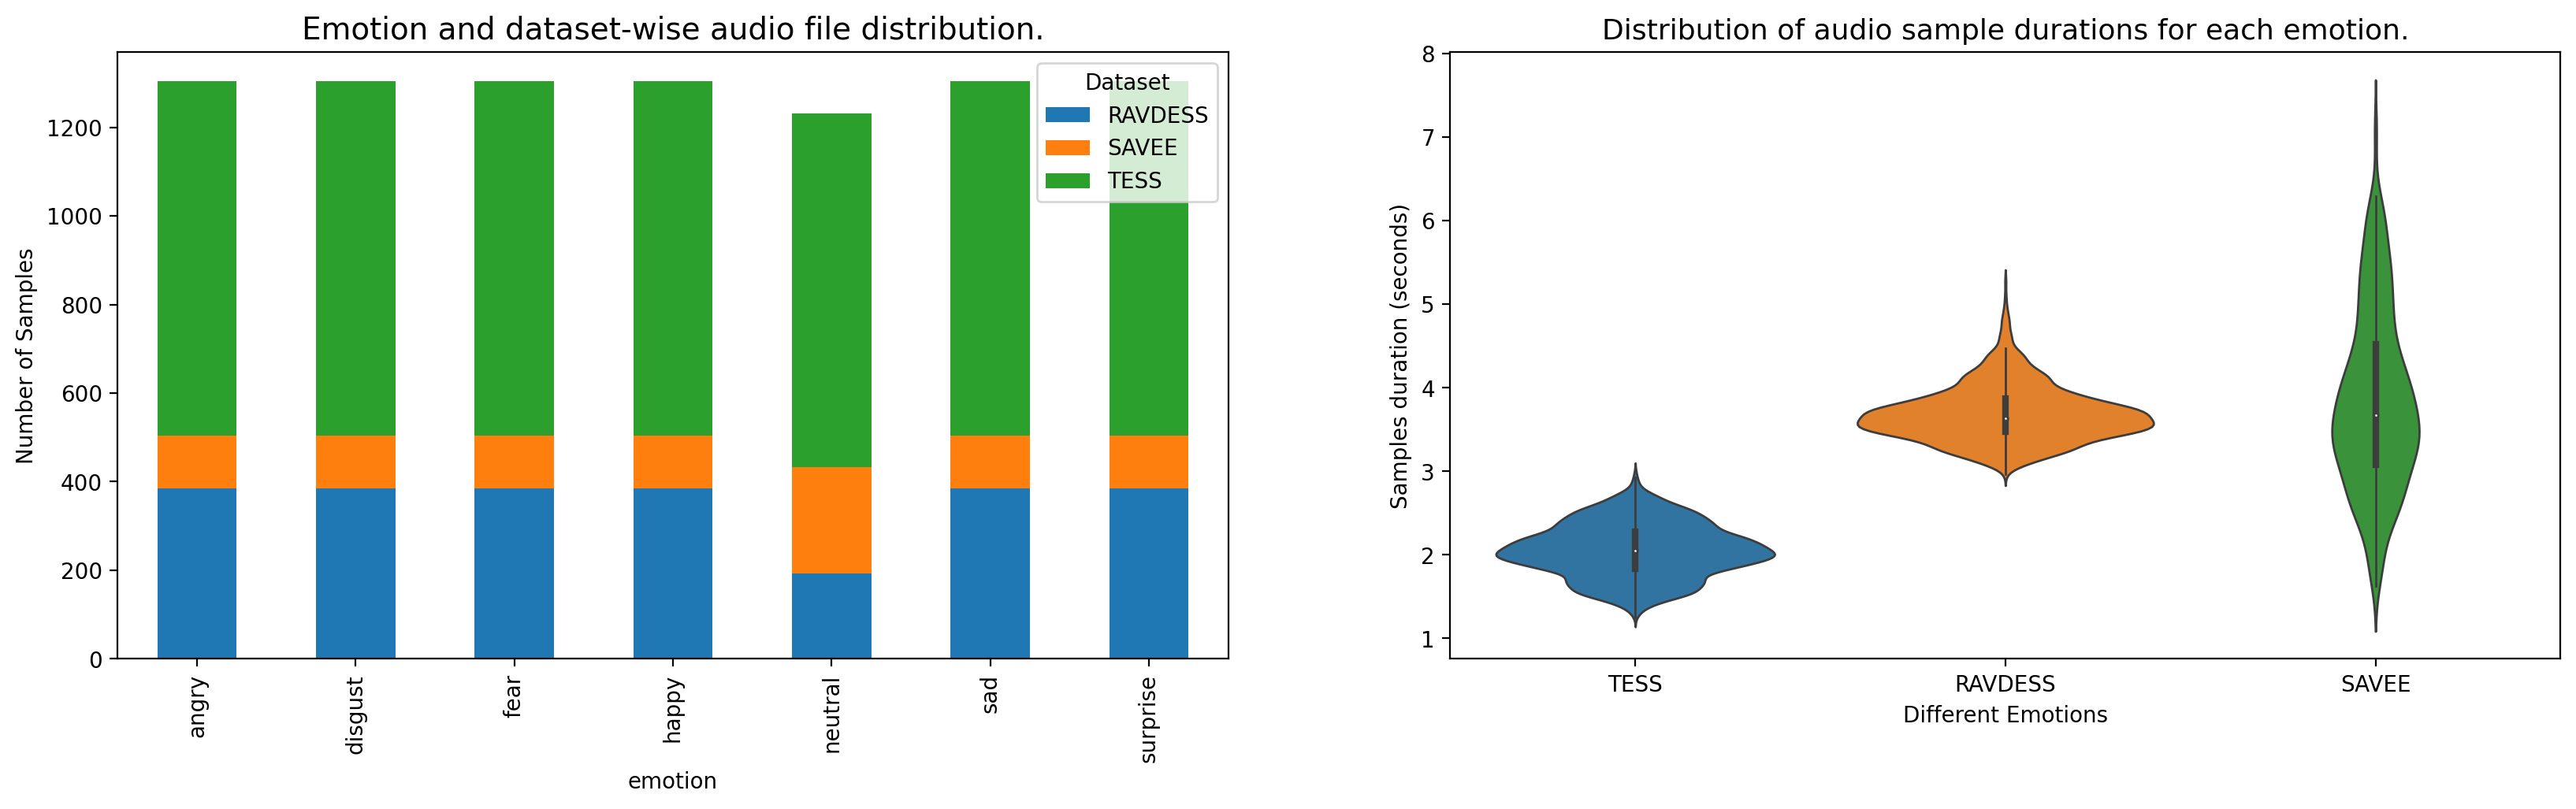

In [ ]:
#Creating a figure with 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Check samples distribution
df.groupby(['emotion','dataset']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Emotion and dataset-wise audio file distribution.', size=14)
axes[0].set_ylabel('Number of Samples')
axes[0].legend(title='Dataset')

# Check duration distribution by each source using violin plots
sns.violinplot(x=df['dataset'],y=df['duration'], linewidth=1, ax=axes[1])
axes[1].set_xlabel('Different Emotions')
axes[1].set_ylabel('Samples duration (seconds)')
axes[1].set_title('Distribution of audio sample durations for each emotion.', size=13)

plt.show()


In [ ]:
# function to display samples information by emotion
# note that a random samples is generated each time the function is called
# this is on purpose as to check different samples of each emotion every time

def show_audio(emotion):
    # create sublots
    fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(15,4))
    # filter dataframe to emotion)
    df_show = df.loc[df['emotion'] == emotion].reset_index(drop=True)
    index = random.randint(0, df_show.shape[0])

    # load audio file:
    y, sr = librosa.load(df_show.path[index], sr=16000)

    # Show waveform
    librosa.display.waveshow(y, sr=sr, ax=axs[0])
    axs[0].set_title('Waveform')

    # Extract fundamental frequency (f0) using a probabilistic approach
    f0, _, _ = librosa.pyin(y, sr=sr, fmin=50, fmax=1500, frame_length=2048)

    # Establish timepoint of f0 signal
    timepoints = np.linspace(0, df_show.duration[index], num=len(f0), endpoint=False)

    # Compute short-time Fourier Transform
    x_stft = np.abs(librosa.stft(y))

    # Apply logarithmic dB-scale to spectrogram and set maximum to 0 dB
    x_stft = librosa.amplitude_to_db(x_stft, ref=np.max)

    # Plot STFT spectrogram
    librosa.display.specshow(x_stft, sr=sr, x_axis="time", y_axis="log", ax=axs[1])

    # Plot fundamental frequency (f0) in spectrogram plot
    axs[1].plot(timepoints, f0, color="cyan", linewidth=4)
    axs[1].set_title('Spectrogram with fundamental frequency')

    # Extract 'n_mfcc' numbers of MFCCs components - in this case 30
    x_mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

    # Plot MFCCs
    librosa.display.specshow(x_mfccs, sr=sr, x_axis="time", norm=Normalize(vmin=-50, vmax=50), ax=axs[2])
    axs[2].set_title('MFCCs')

    # Show metadata in title
    plt.suptitle('File: {}  -  Emotion: {}'.format(df_show.path[index], df_show.emotion[index]), size=14)
    plt.tight_layout()
    plt.show()

    # Display media player for the selected file
    display(ipd.Audio(y, rate=sr))

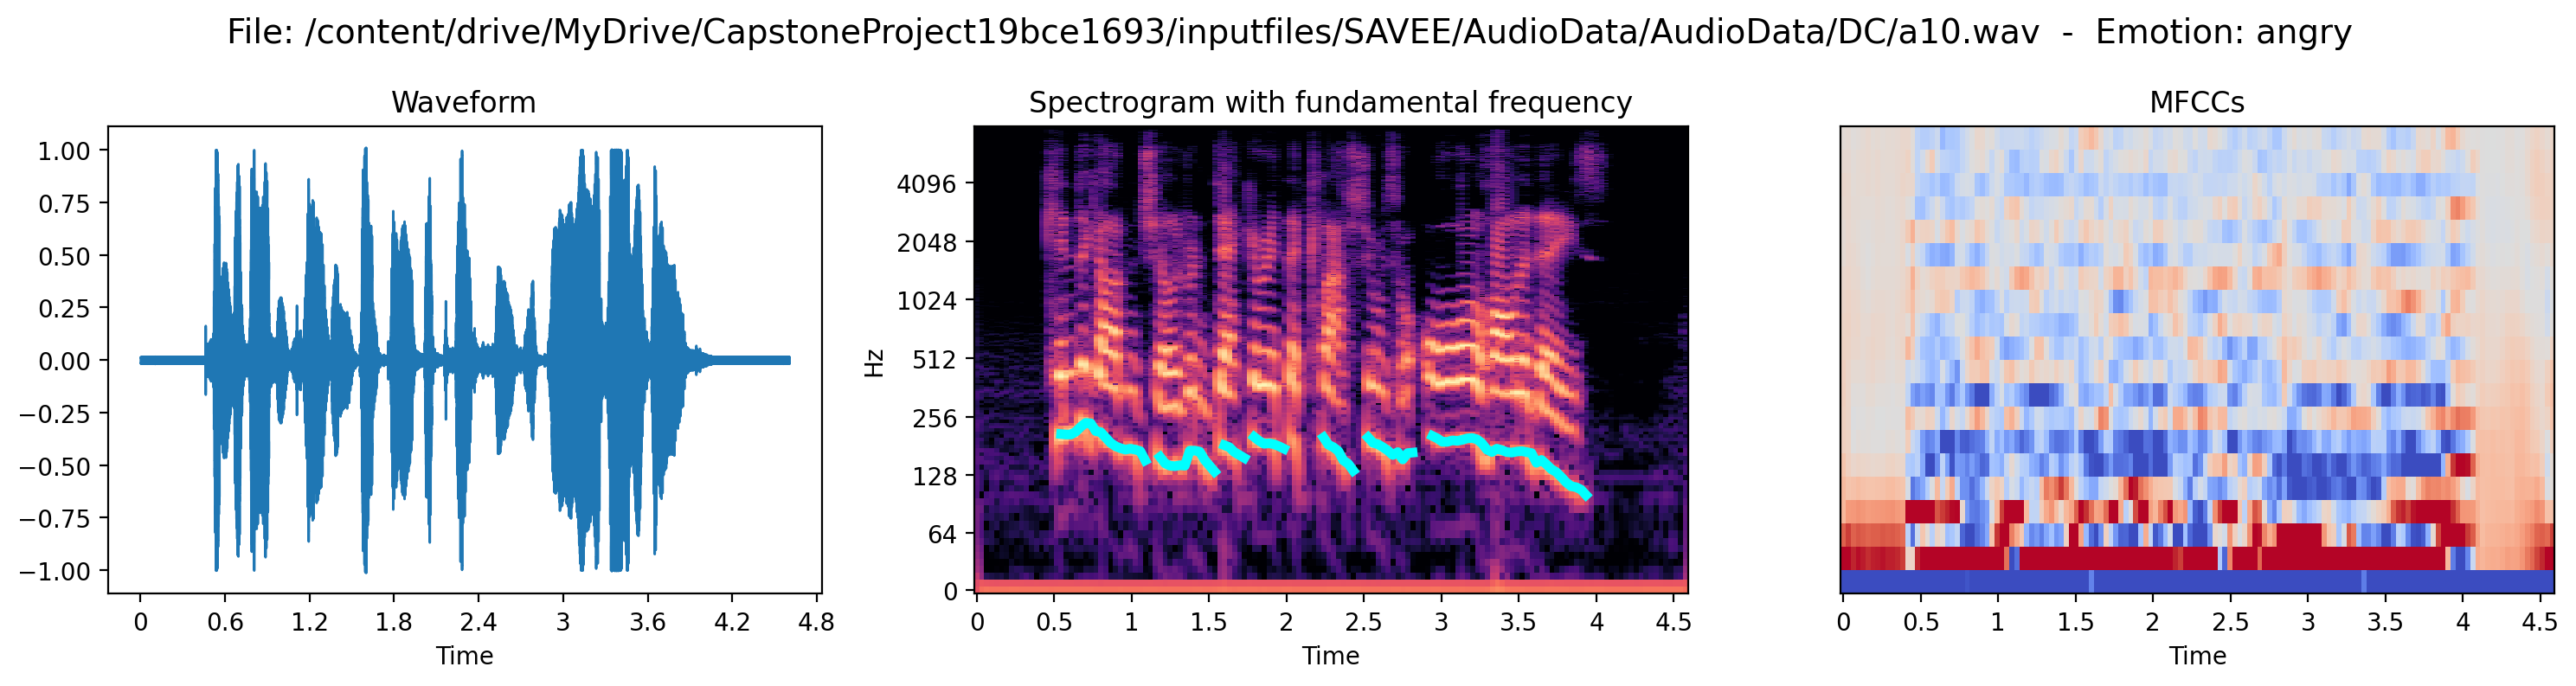

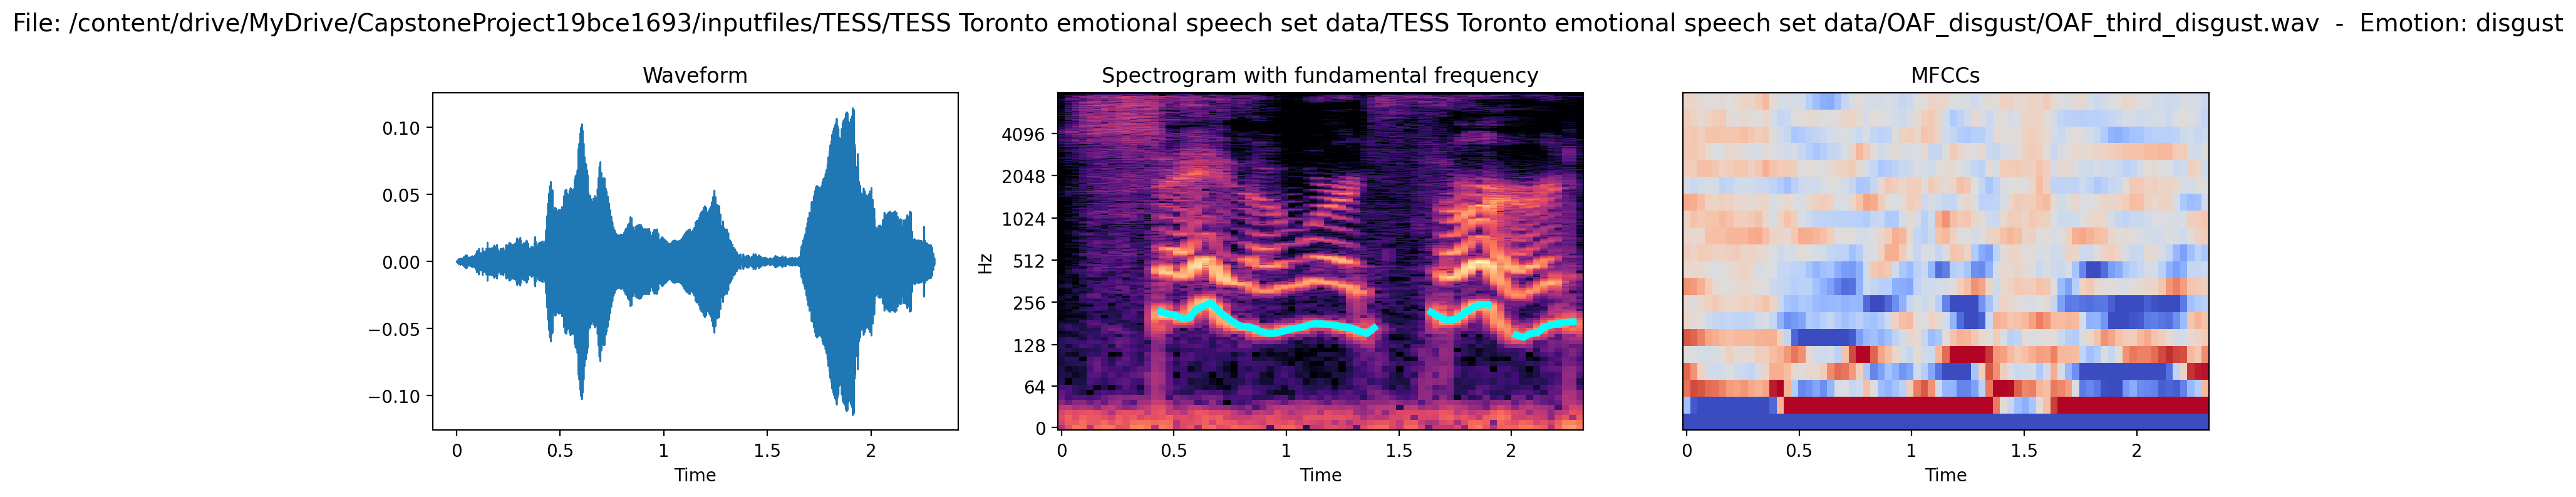

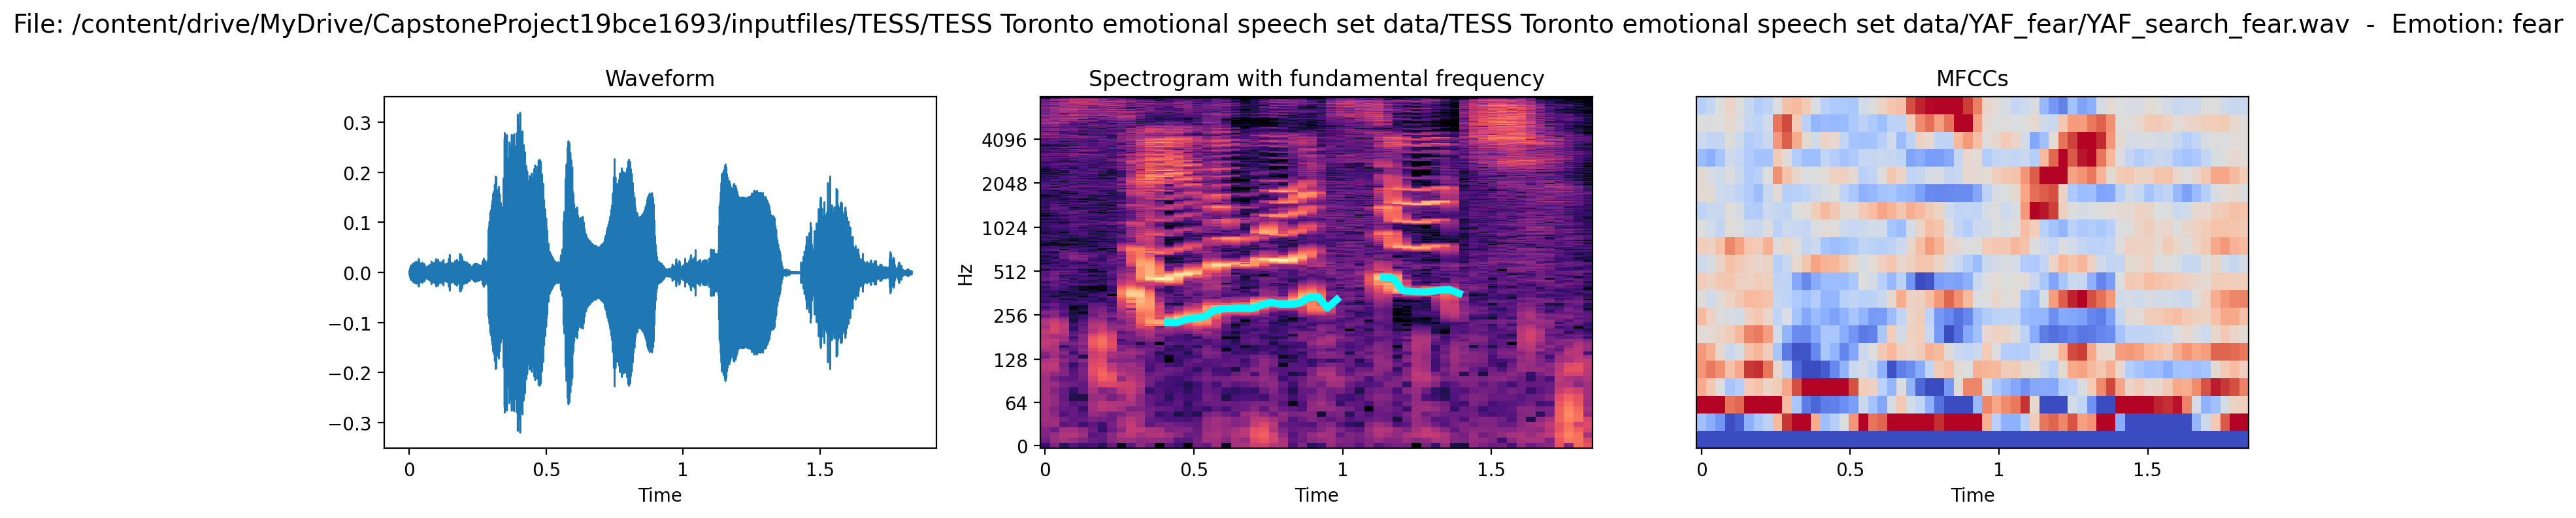

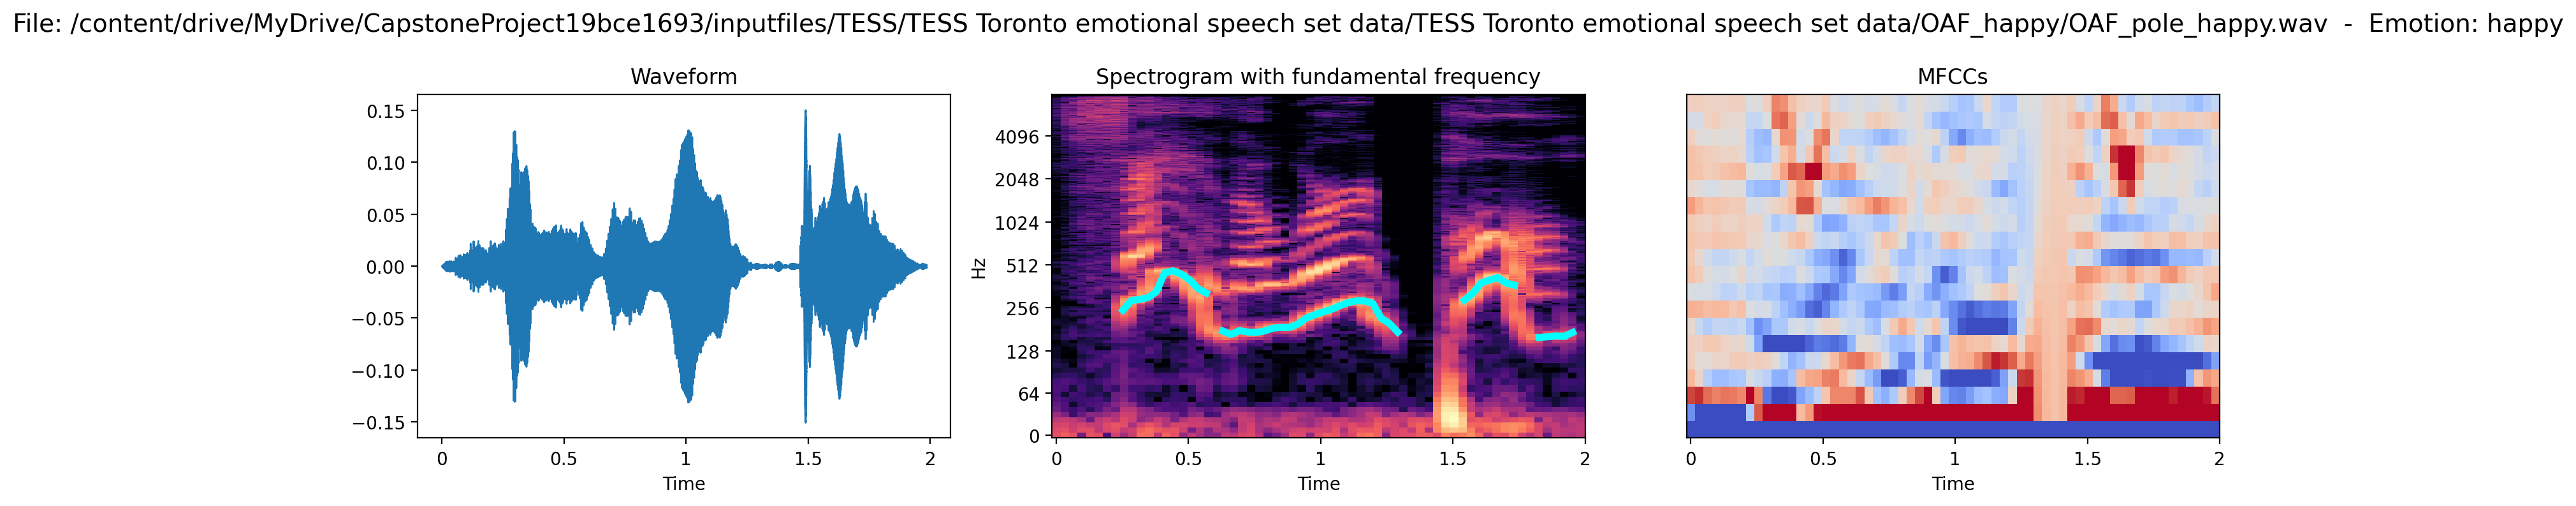

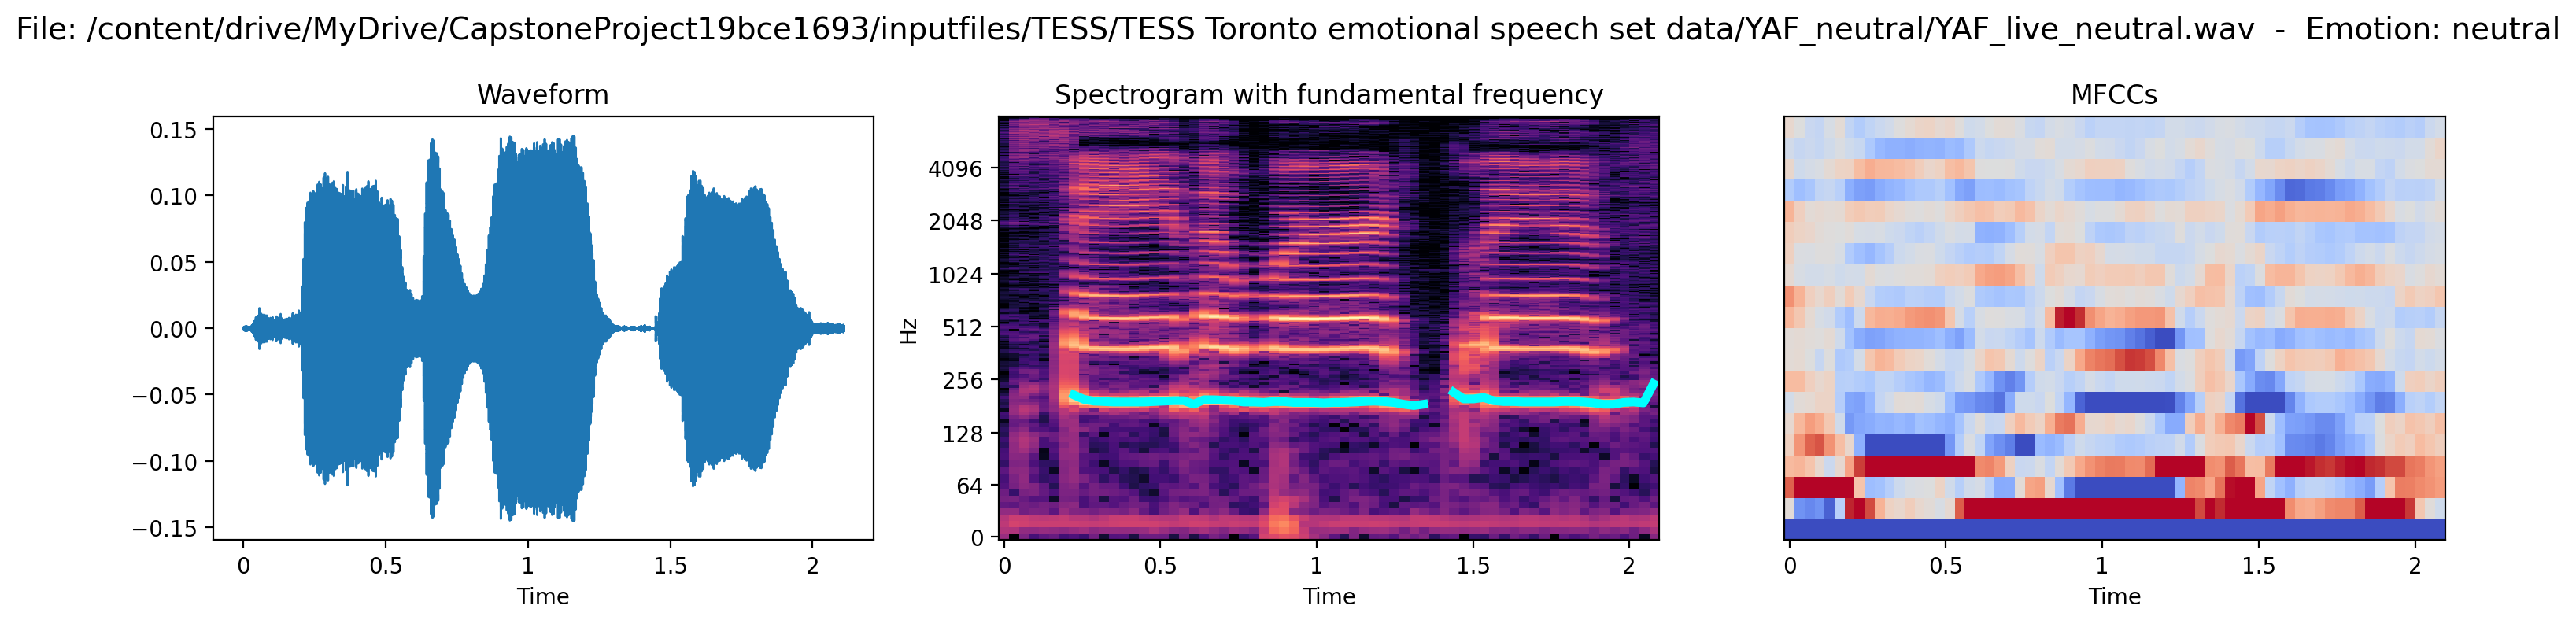

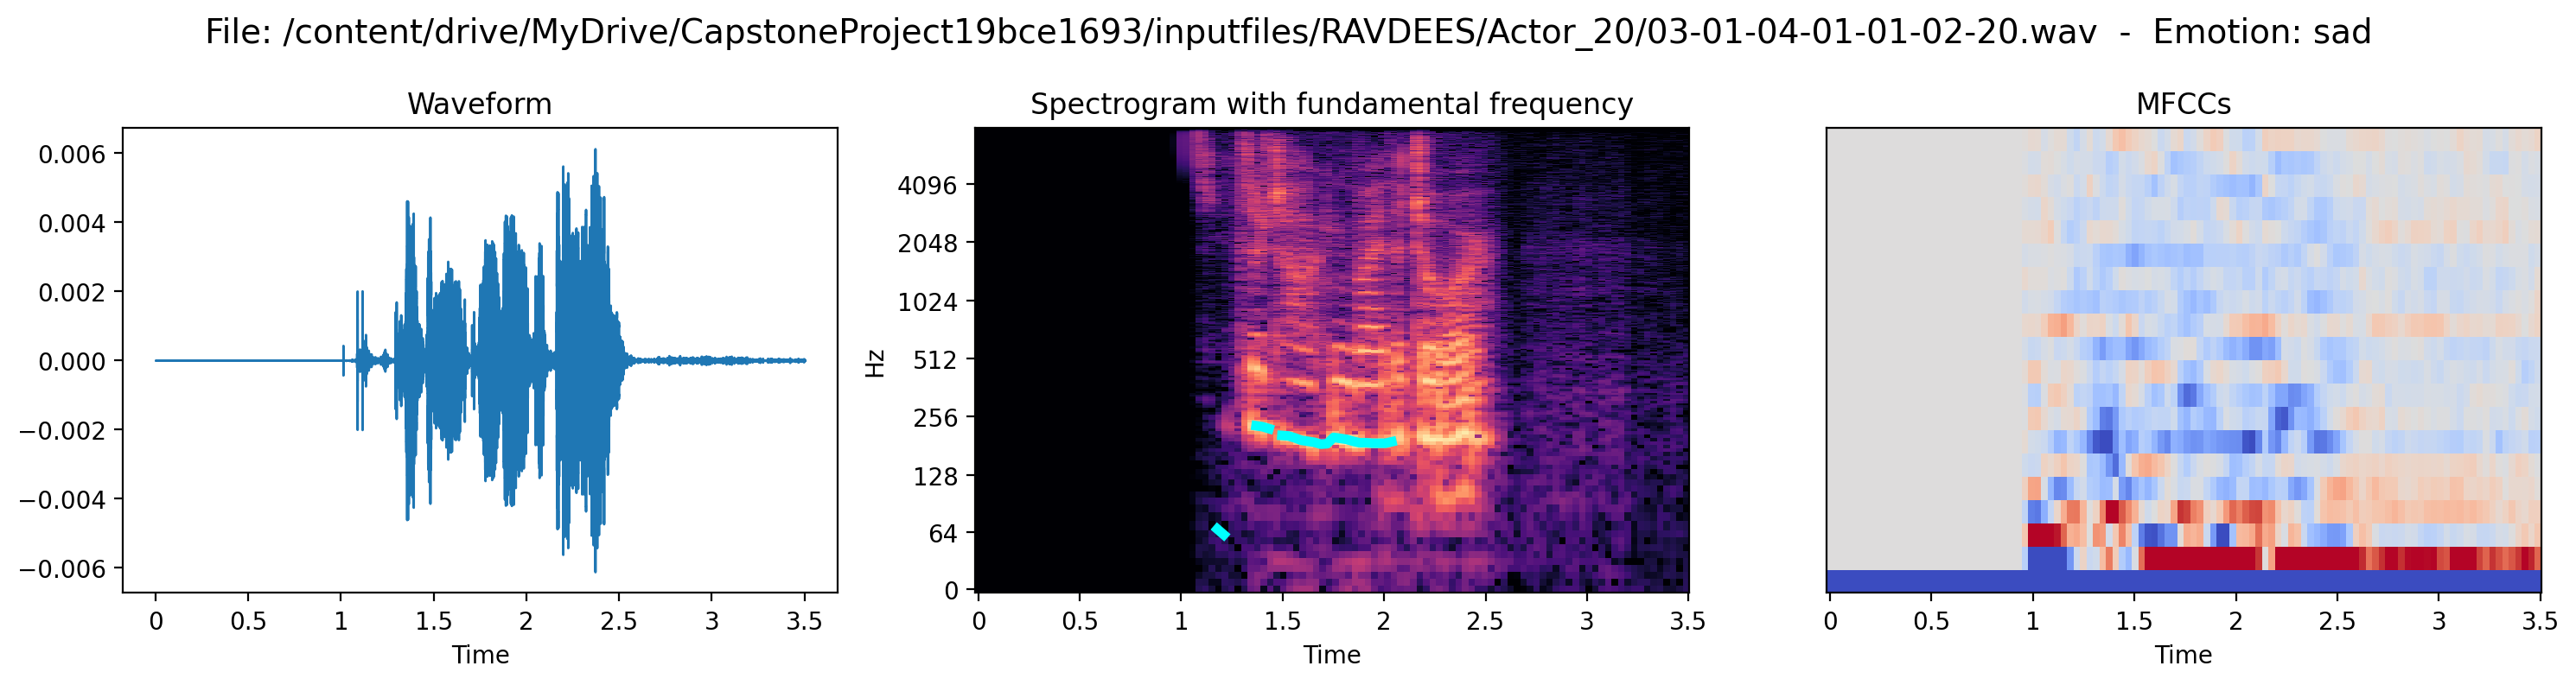

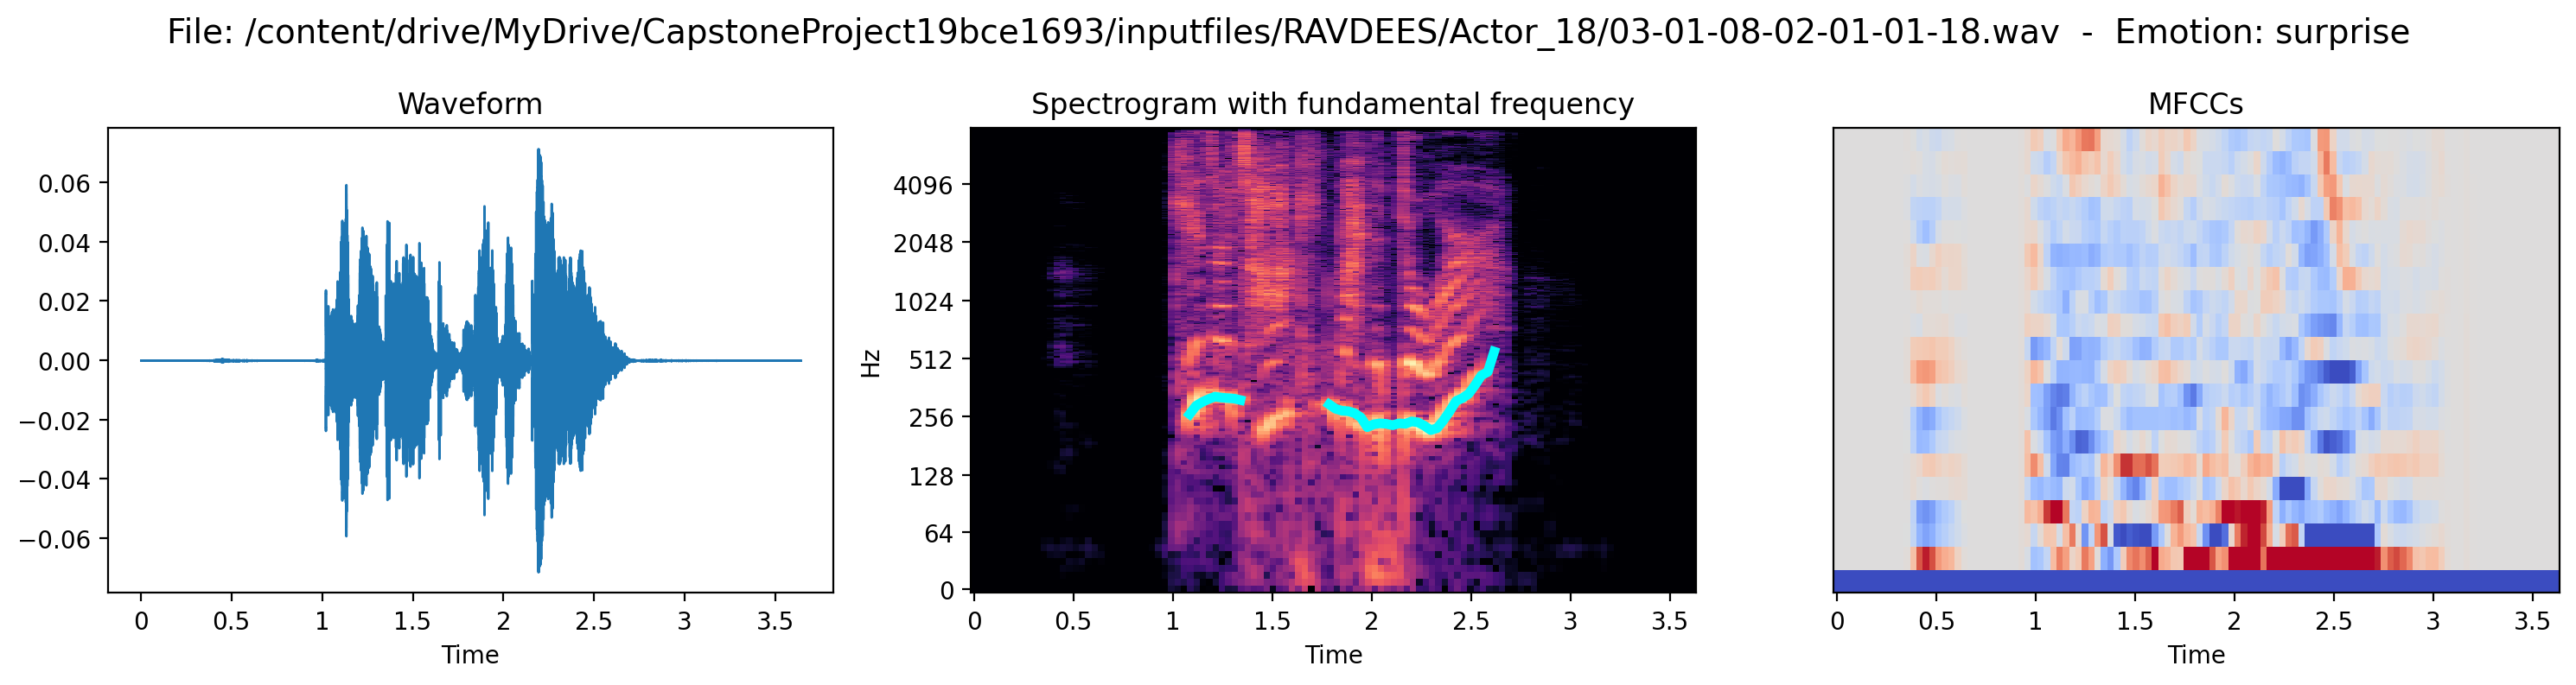

In [ ]:
# Getting ordered list of emotions ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
emotions = sorted(list(df.emotion.unique()))

# Get waveforms, spectograms, mfccs and media player for each emotion
for emotion in emotions:
    show_audio(emotion)


In [ ]:
%%time

# Create an empty list to store the extracted MFCCs data
mfccs = []

# Loop through each audio file path in the dataframe
for file in df.path:

    # Load the audio file into memory using librosa
    # The audio is resampled to 16,000 Hz to standardize the data
    y, sr = librosa.load(file, sr=16000)

    # Extract the Mel-frequency cepstral coefficients (MFCCs) of the audio signal
    # The first 50 Hz of the audio signal are removed from consideration to exclude noise
    # and only the first 30 coefficients are retained to reduce the dimensionality of the data
    mfccs.append(librosa.feature.mfcc(y=y, sr=sr, fmin=50, n_mfcc=30))

# The mfccs list will contain a numpy array of 30 coefficients for each audio file in df.path
# The length of mfccs will be equal to the number of audio files in the dataframe


CPU times: user 2min 51s, sys: 2min 34s, total: 5min 26s
Wall time: 3min 49s


In [ ]:
# Define function to resize the 2D arrays
def resize_array(array):
    new_matrix = np.zeros((30,150))   # Initialize the new matrix shape with an array 30X150 of zeros
    for i in range(30):               # Iterate rows
        for j in range(150):          # Iterate columns
            try:                                 # the mfccs of a sample will replace the matrix of zeros, then cutting the array up to 150
                new_matrix[i][j] = array[i][j]
            except IndexError:                   # if mfccs of a sample is shorter than 150, then keep looping to extend lenght to 150 with 0s
                pass
    return new_matrix

# Create a variable to store the new resized mfccs and apply function for all the extracted mfccs
resized_mfccs = []

for mfcc in mfccs:
    resized_mfccs.append(resize_array(mfcc))

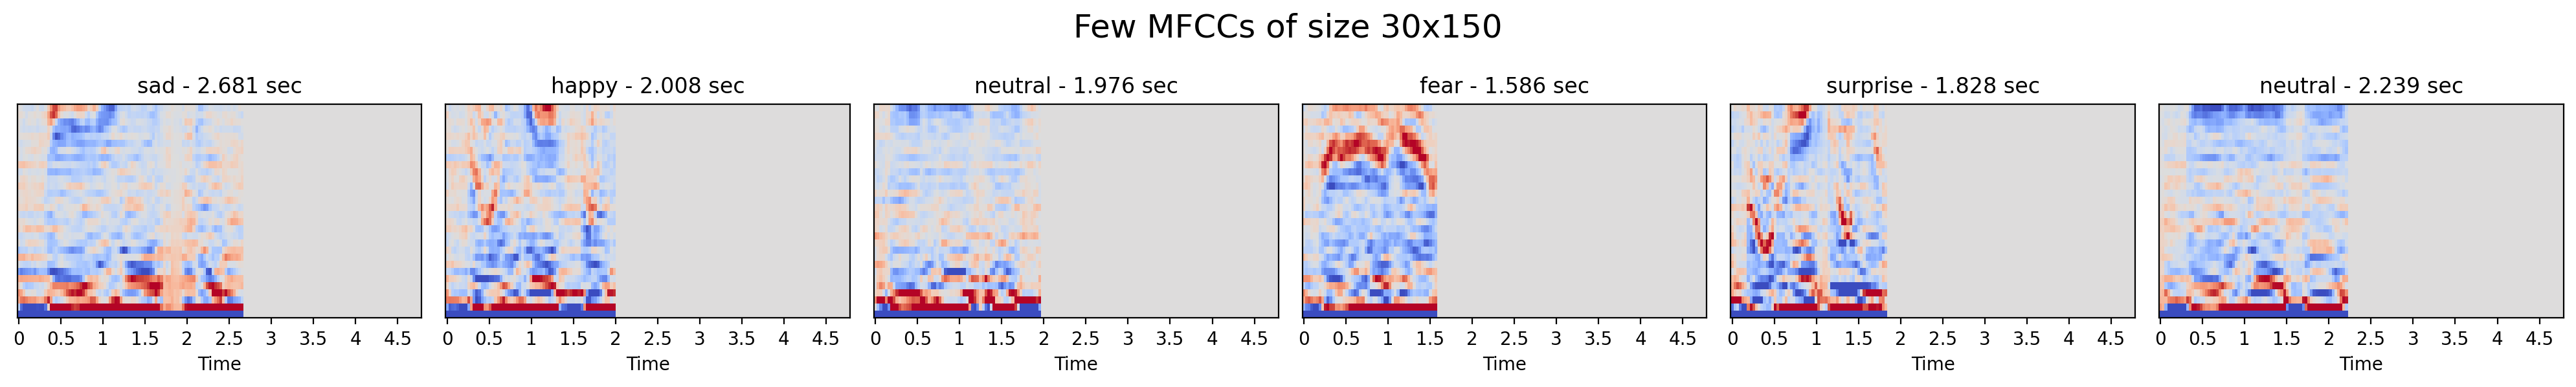

In [ ]:
# Create sublots
fig, axs = plt.subplots(nrows=1,ncols=6, figsize=(20,3))

# Select 6 random MFCCs
for i in range(6):
    index = random.randint(0, len(resized_mfccs))

    # Plot MFCCs
    librosa.display.specshow(resized_mfccs[index], sr=sr, x_axis="time", ax=axs[i], norm=Normalize(vmin=-50, vmax=50))
    axs[i].set_title(str(df.emotion[index]) + ' - ' + str(df.duration[index]) + ' sec')

plt.suptitle('Few MFCCs of size 30x150', size=18)
plt.tight_layout()
plt.show()

# Convolutional Neural Network model



In [ ]:
from sklearn.model_selection import train_test_split

# Select target and replace labels with numerical values
df['emotion'].replace({'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}, inplace=True)
y = df.emotion.values

# Define features
X = resized_mfccs.copy()

# Create train, validation and test set
# Split the data into 90% train and 10% test
x_tr, x_te, y_tr, y_te = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=0)

# Further split the training set into 70% train and 30% validation
x_tr, x_va, y_tr, y_va = train_test_split(x_tr, y_tr, test_size=0.3, shuffle=True, random_state=0)

# Convert data to numpy arrays
x_tr = np.array([i for i in x_tr])
x_va = np.array([i for i in x_va])
x_te = np.array([i for i in x_te])

# Print the size of the datasets
print(x_tr.shape)
print(x_va.shape)
print(x_te.shape)


(5705, 30, 150)
(2445, 30, 150)
(906, 30, 150)


In [ ]:
# Get mean and standard deviation from the training set
tr_mean = np.mean(x_tr, axis=0)
tr_std = np.std(x_tr, axis=0)

# Apply data scaling
x_tr = (x_tr - tr_mean)/tr_std
x_va = (x_va - tr_mean)/tr_std
x_te = (x_te - tr_mean)/tr_std


In [ ]:
# Add the 'channel' dimension to the MFCCs spectrum input 'images'
print(f"x_tr has a dimension of {x_tr.shape} before the manipulation.")

x_tr = x_tr[..., None]
x_va = x_va[..., None]
x_te = x_te[..., None]

print(f"x_tr has a dimension of {x_tr.shape} after the manipulation.")


x_tr has a dimension of (5705, 30, 150) before the manipulation.
x_tr has a dimension of (5705, 30, 150, 1) after the manipulation.


In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import (Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPool2D)
from tensorflow.keras import initializers

#Create convolutional neural network and return summary
model = keras.Sequential()

#Add first convolutional layer with 64 filters, 5x5 kernel size, stride of 2, ReLU activation function and input shape of x_tr
model.add(Conv2D(filters=64, kernel_size=5, strides=(2, 2), activation="relu", input_shape=x_tr.shape[1:]))

#Add MaxPooling layer with pool size of 2
model.add(MaxPool2D(pool_size=2))

#Add batch normalization layer to normalize and scale the inputs
model.add(BatchNormalization())

#Add second convolutional layer with 32 filters, 4x4 kernel size, stride of 2 in the vertical direction and 1 in the horizontal direction, ReLU activation function
model.add(Conv2D(filters=32, kernel_size=4, strides=(2, 1), activation="relu"))

#Add another MaxPooling layer
model.add(MaxPool2D(pool_size=2))

#Add batch normalization layer
model.add(BatchNormalization())

#Flatten the 2D output into a 1D array
model.add(Flatten())

#Add dropout layer to prevent overfitting
model.add(Dropout(0.5))

#Add a fully connected dense layer with 128 nodes and ReLU activation function
model.add(Dense(128, activation="relu"))

#Add dropout layer
model.add(Dropout(0.5))

#Add another fully connected dense layer with 64 nodes and ReLU activation function
model.add(Dense(64, activation="relu"))

#Add dropout layer
model.add(Dropout(0.5))

#Add output layer with 7 nodes and softmax activation function to output probabilities for each of the 7 possible emotions
model.add(Dense(units=7, activation="softmax"))

#Print the summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 73, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 36, 64)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 6, 36, 64)        256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 33, 32)         32800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 16, 32)        0         
 2D)                                                             
                                                        

In [ ]:
# Compile the model using Adam's default learning rate
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Create 'EarlyStopping' callback
earlystopping_cb = keras.callbacks.EarlyStopping(patience=5)


In [ ]:
%%time

#  Train the neural network
history = model.fit(
    x=x_tr,
    y=y_tr,
    epochs=5000,
    batch_size=32,
    validation_data=(x_va, y_va),
    callbacks=[earlystopping_cb]
)


Epoch 1/5000
179/179 [==============================] - 15s 84ms/step - loss: 0.1326 - accuracy: 0.9574 - val_loss: 0.1928 - val_accuracy: 0.9444
Epoch 2/5000
179/179 [==============================] - 14s 76ms/step - loss: 0.1445 - accuracy: 0.9539 - val_loss: 0.2038 - val_accuracy: 0.9415
Epoch 3/5000
179/179 [==============================] - 15s 81ms/step - loss: 0.1252 - accuracy: 0.9606 - val_loss: 0.1994 - val_accuracy: 0.9493
Epoch 4/5000
179/179 [==============================] - 14s 76ms/step - loss: 0.1227 - accuracy: 0.9613 - val_loss: 0.2158 - val_accuracy: 0.9476
Epoch 5/5000
179/179 [==============================] - 14s 76ms/step - loss: 0.1499 - accuracy: 0.9571 - val_loss: 0.2279 - val_accuracy: 0.9382
Epoch 6/5000
179/179 [==============================] - 14s 76ms/step - loss: 0.1586 - accuracy: 0.9530 - val_loss: 0.1943 - val_accuracy: 0.9419
CPU times: user 2min 5s, sys: 1.66 s, total: 2min 6s
Wall time: 1min 24s


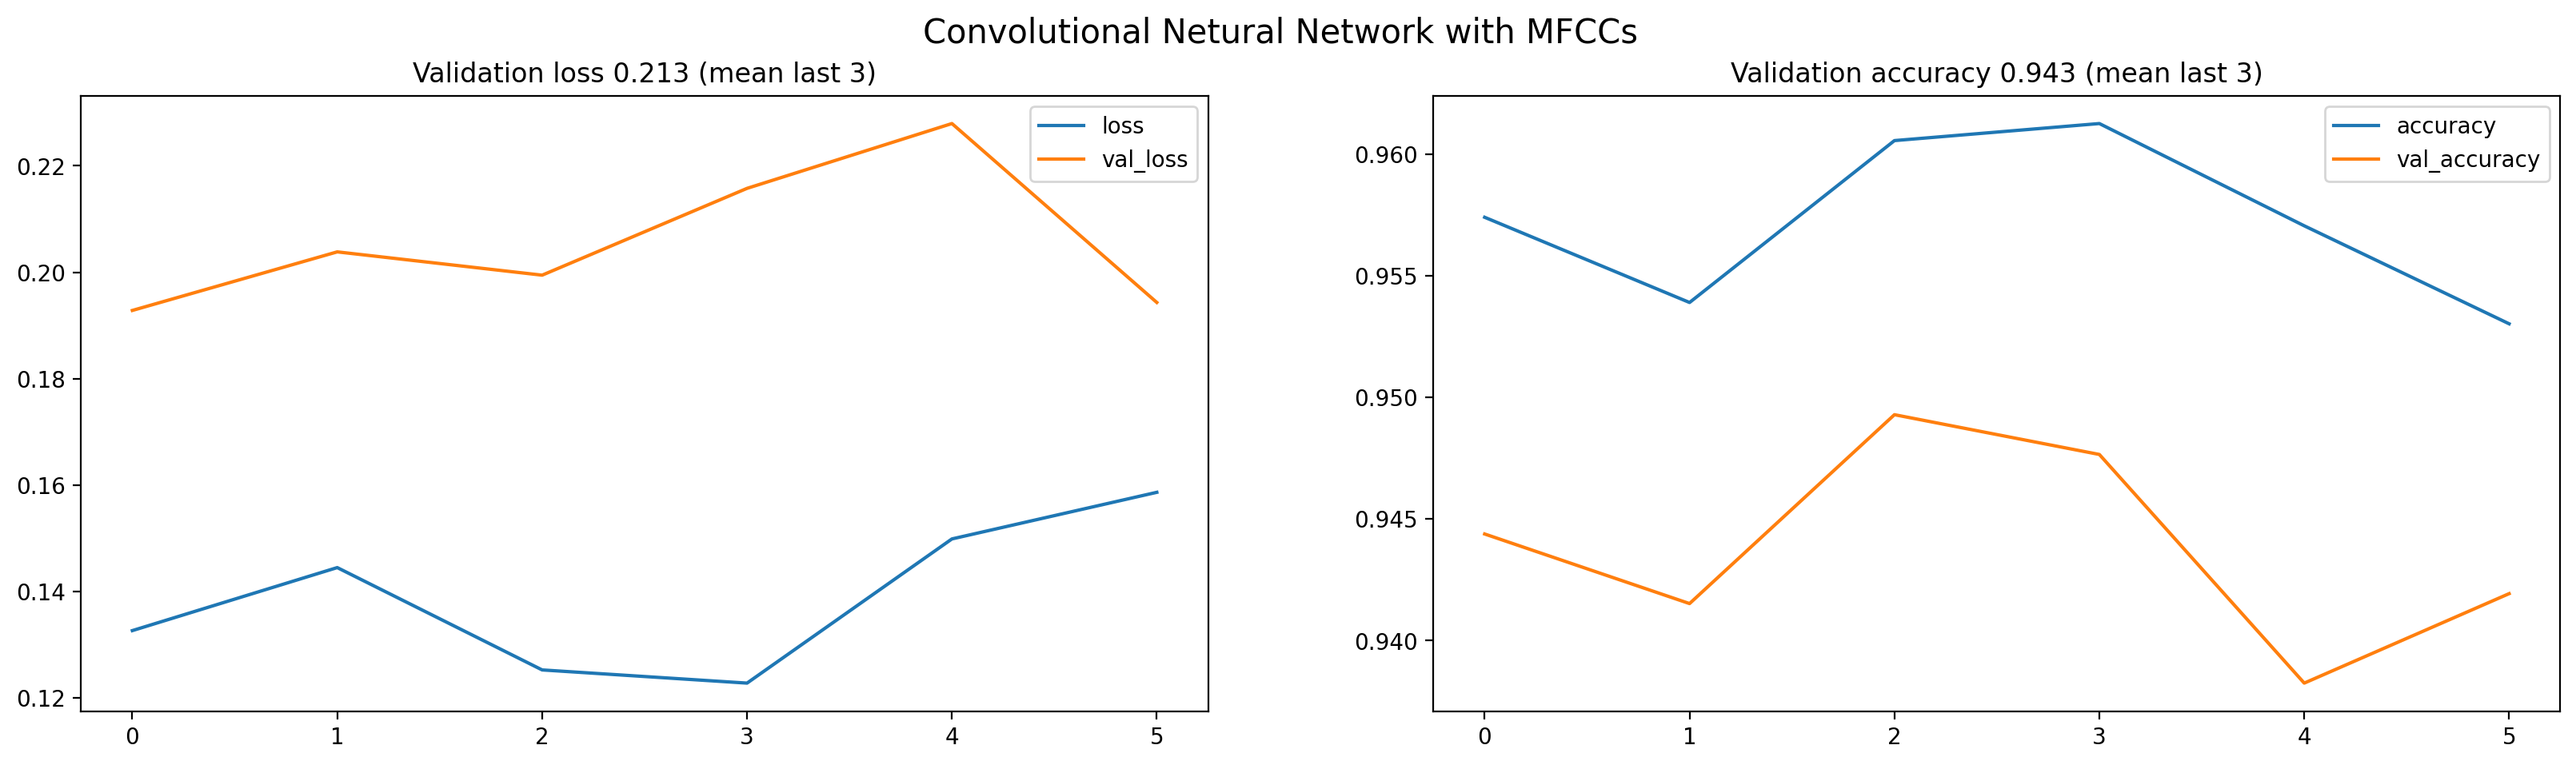

In [ ]:
# Plots neural network performance metrics for train and validation
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
plt.suptitle('Convolutional Netural Network with MFCCs', size=15)
results = pd.DataFrame(history.history)
results[["loss", "val_loss"]].plot(ax=axs[0])
axs[0].set_title("Validation loss {:.3f} (mean last 3)".format(np.mean(history.history["val_loss"][-3:])))
results[["accuracy", "val_accuracy"]].plot(ax=axs[1])
axs[1].set_title("Validation accuracy {:.3f} (mean last 3)".format(np.mean(history.history["val_accuracy"][-3:])))
plt.show()

In [ ]:
# Collect loss and accuracy for the test set
loss_te, accuracy_te = model.evaluate(x_te, y_te)

print("Test loss: {:.2f}".format(loss_te))
print("Test accuracy: {:.2f}%".format(100 * accuracy_te))


29/29 [==============================] - 0s 14ms/step - loss: 0.1654 - accuracy: 0.9525
Test loss: 0.17
Test accuracy: 95.25%


29/29 [==============================] - 1s 24ms/step


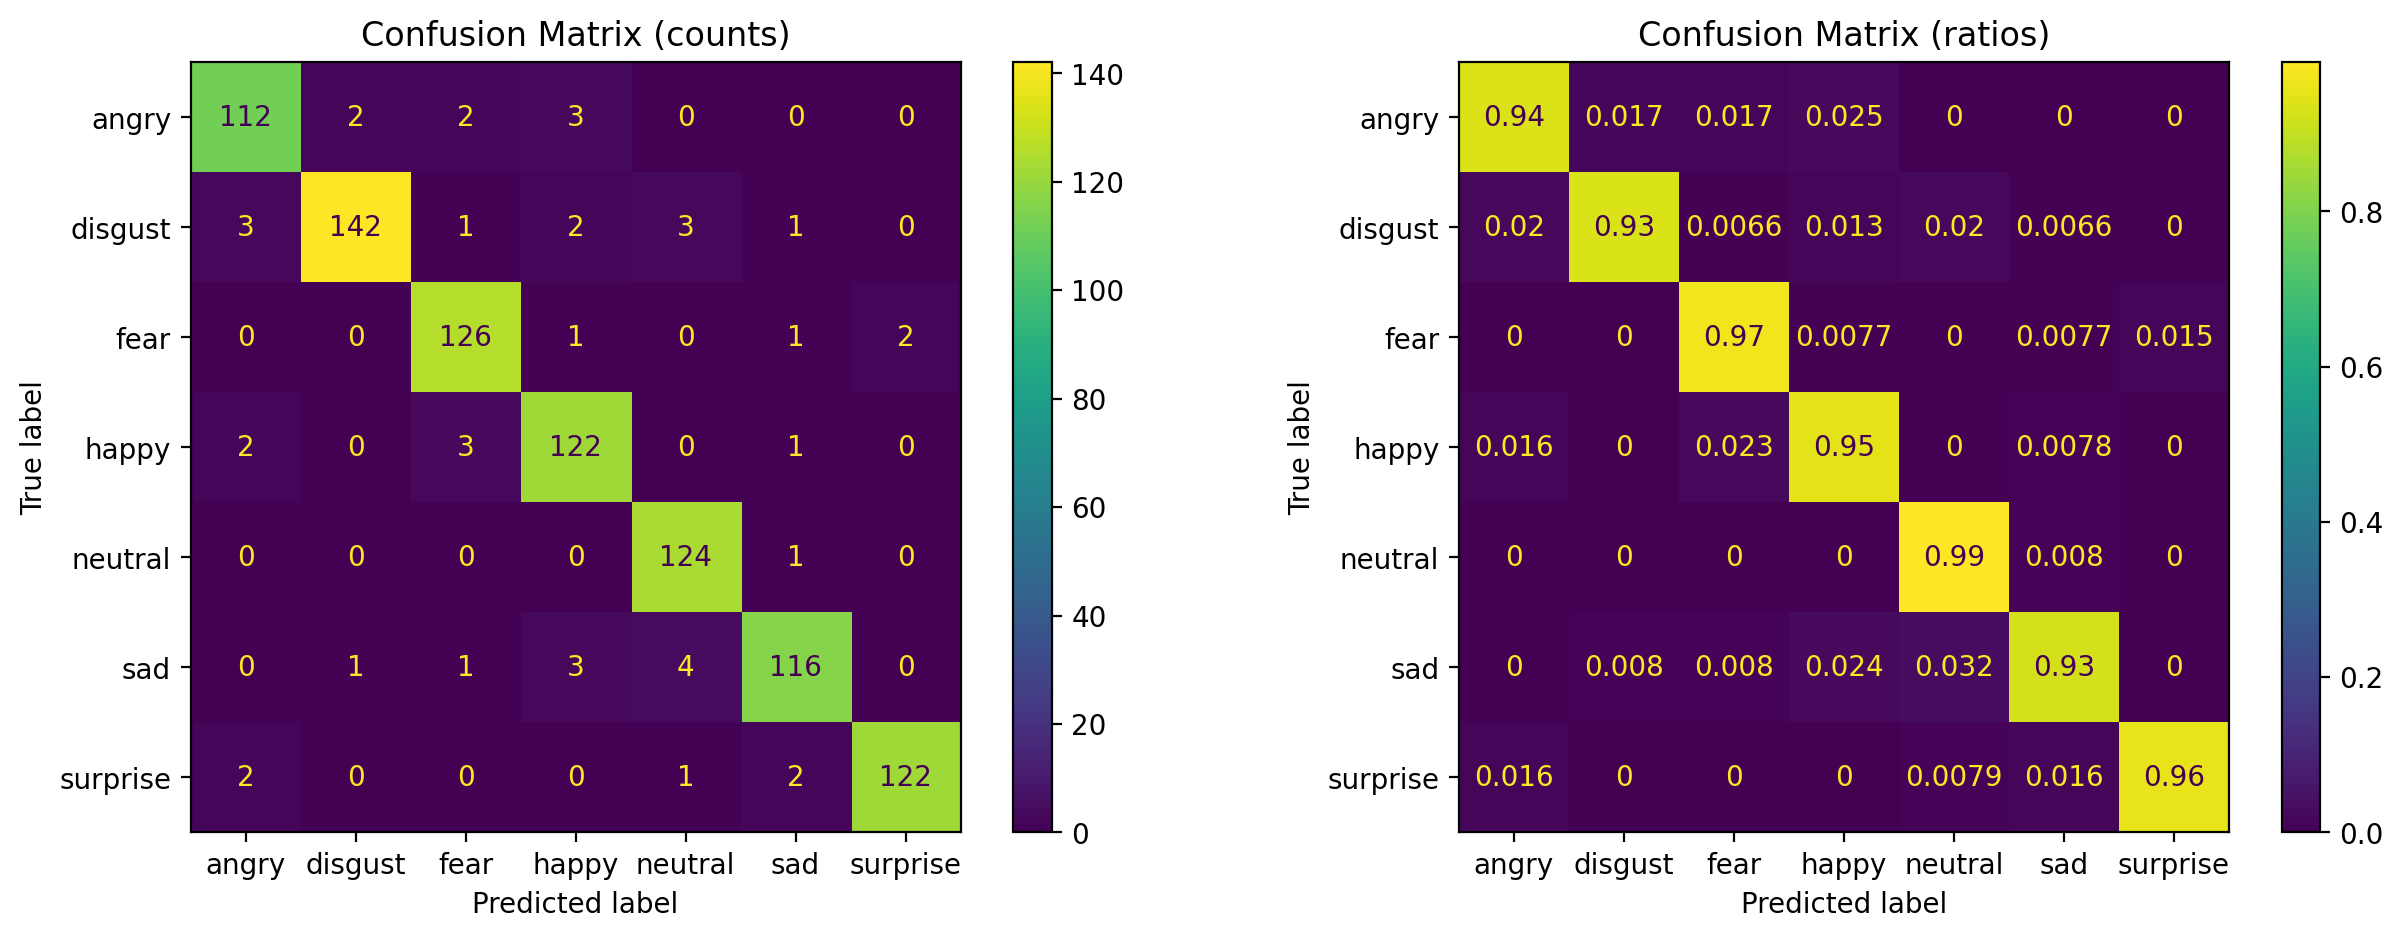

In [ ]:
# Compute test set predictions
predictions = model.predict(x_te)

pred = []

for i in predictions:
    pred.append(np.argmax(i))

from sklearn.metrics import ConfusionMatrixDisplay

labels = {'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}

def plot_confusion_matrices(y_true, y_pred):

    # Create two subplots
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plots the standard confusion matrix
    ax1.set_title("Confusion Matrix (counts)")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=labels, ax=ax1)

    # Plots the normalized confusion matrix
    ax2.set_title("Confusion Matrix (ratios)")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=labels, normalize="true", ax=ax2)

    plt.show()

# Plot confusion matrices
plot_confusion_matrices(y_te, pred)